In [3]:
!pip install mrmr_selection

from pandas import read_excel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from mrmr import mrmr_classif

import sklearn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, mean_absolute_percentage_error, d2_tweedie_score

In [4]:
df = pd.read_csv('/kaggle/input/secondary-school-result/Science.csv') 
df.drop('Group SSC', axis=1, inplace=True)
df.head()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,PEC Science,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Overall GPA SSC
0,0,4,2,0,2,20000,0,3,0,5.0,...,5.0,5.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.00
1,0,5,3,2,2,57000,0,1,0,5.0,...,5.0,5.00,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.00
2,0,4,2,1,2,100000,80000,2,1,5.0,...,5.0,4.65,4.0,4.0,5.0,4.0,5.0,4.0,5.0,4.11
3,0,5,5,1,2,400000,100000,1,0,5.0,...,5.0,5.00,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.61
4,1,0,0,1,2,50000,0,3,0,5.0,...,5.0,4.30,4.0,4.0,5.0,5.0,4.0,4.0,5.0,4.50


In [5]:
df.describe()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,PEC Science,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Overall GPA SSC
count,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,0.517241,3.275862,2.752874,0.752874,1.747126,6.566954e+04,9813.218391,2.097701,1.816092,4.791782,...,4.758621,4.807069,4.505747,4.574713,4.606322,4.758621,4.841954,4.827586,4.686782,4.719713
std,0.501145,1.677389,1.543911,0.664429,0.640058,1.223355e+05,35710.758373,1.350100,2.375349,0.401013,...,0.503526,0.352394,0.662777,0.596370,0.742138,0.517676,0.405196,0.415227,0.549196,0.384729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,3.000000,...,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000,3.500000,3.000000,3.000000,3.220000
25%,0.000000,3.000000,2.000000,0.000000,2.000000,1.800000e+04,0.000000,1.000000,0.000000,4.750000,...,5.000000,4.705000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.512500
50%,1.000000,4.000000,3.000000,1.000000,2.000000,3.500000e+04,0.000000,2.000000,1.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.930000
75%,1.000000,5.000000,4.000000,1.000000,2.000000,7.000000e+04,2750.000000,3.000000,2.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,1.000000,6.000000,5.000000,2.000000,2.000000,1.200000e+06,400000.000000,7.000000,7.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.shape

(174, 25)

In [7]:
df.columns

Index(['Gender', 'Father Highest Academic Qualification',
       'Mother Highest Academic Qualification', 'Father Profession',
       'Mother Profession', 'Father average monthly income',
       'Mother average monthly income', 'How many siblings do you have',
       'District Currently you are living', 'PEC Result Overall GPA',
       'PEC  Bangla', 'PEC English', 'PEC Mathematics', 'PEC Religion',
       'PEC  BGS', 'PEC Science', 'JSC Overall GPA', 'JSC Bangla',
       'JSC English', 'JSC Mathematics', 'JSC  BGS', 'JSC  ICT',
       'JSC Religion', 'JSC Science', 'Overall GPA SSC'],
      dtype='object')

In [8]:
df.nunique()

Gender                                    2
Father Highest Academic Qualification     7
Mother Highest Academic Qualification     6
Father Profession                         3
Mother Profession                         3
Father average monthly income            46
Mother average monthly income            29
How many siblings do you have             8
District Currently you are living         8
PEC Result Overall GPA                   28
PEC  Bangla                               4
PEC English                               5
PEC Mathematics                           4
PEC Religion                              3
PEC  BGS                                  4
PEC Science                               4
JSC Overall GPA                          45
JSC Bangla                                5
JSC English                               5
JSC Mathematics                           6
JSC  BGS                                  5
JSC  ICT                                  3
JSC Religion                    

In [9]:
df.isnull().sum()

Gender                                   0
Father Highest Academic Qualification    0
Mother Highest Academic Qualification    0
Father Profession                        0
Mother Profession                        0
Father average monthly income            0
Mother average monthly income            0
How many siblings do you have            0
District Currently you are living        0
PEC Result Overall GPA                   0
PEC  Bangla                              0
PEC English                              0
PEC Mathematics                          0
PEC Religion                             0
PEC  BGS                                 0
PEC Science                              0
JSC Overall GPA                          0
JSC Bangla                               0
JSC English                              0
JSC Mathematics                          0
JSC  BGS                                 0
JSC  ICT                                 0
JSC Religion                             0
JSC Science

In [10]:
df.corr()

,Gender,Father Highest Academic Qualification,Mother Highest Academic Qualification,Father Profession,Mother Profession,Father average monthly income,Mother average monthly income,How many siblings do you have,District Currently you are living,PEC Result Overall GPA,...,PEC Science,JSC Overall GPA,JSC Bangla,JSC English,JSC Mathematics,JSC BGS,JSC ICT,JSC Religion,JSC Science,Overall GPA SSC
Gender,1.000000,-0.218857,-0.244734,-0.065249,0.049712,0.051030,-0.184813,0.053027,0.070661,-0.166835,...,-0.132308,-0.213611,-0.165628,-0.139721,-0.195346,-0.139832,-0.107484,-0.013410,-0.227040,-0.243864
Father Highest Academic Qualification,-0.218857,1.000000,0.798755,-0.265225,-0.306143,0.173502,0.166746,-0.374415,-0.243976,0.246152,...,0.216170,0.173094,-0.118421,0.259528,0.097031,0.083783,0.102789,0.014738,0.188457,0.043028
Mother Highest Academic Qualification,-0.244734,0.798755,1.000000,-0.217655,-0.426268,0.226112,0.237934,-0.487508,-0.176387,0.294808,...,0.279729,0.161851,-0.100284,0.280702,0.111349,0.102124,0.186683,0.009794,0.133150,0.046688
Father Profession,-0.065249,-0.265225,-0.217655,1.000000,0.178416,-0.066435,-0.024978,0.130171,-0.091226,-0.057564,...,-0.067025,-0.052980,-0.003319,-0.018780,-0.075354,-0.124012,-0.092236,0.001806,-0.078703,0.051051
Mother Profession,0.049712,-0.306143,-0.426268,0.178416,1.000000,-0.102283,-0.288858,0.249496,0.022462,-0.099577,...,-0.082874,-0.087363,-0.030619,-0.025935,-0.016085,-0.115499,0.001025,-0.099748,-0.062185,0.018952
Father average monthly income,0.051030,0.173502,0.226112,-0.066435,-0.102283,1.000000,0.345755,-0.026961,-0.165074,-0.010520,...,0.033042,0.044310,-0.098518,0.119362,0.088011,0.046469,0.033515,0.014462,0.018152,0.053520
Mother average monthly income,-0.184813,0.166746,0.237934,-0.024978,-0.288858,0.345755,1.000000,-0.101168,-0.127837,-0.000324,...,0.047305,0.000110,-0.032741,0.023933,0.051736,0.051484,0.038894,-0.012515,0.054546,0.020689
How many siblings do you have,0.053027,-0.374415,-0.487508,0.130171,0.249496,-0.026961,-0.101168,1.000000,0.108374,-0.141253,...,-0.169178,-0.109226,-0.026470,-0.052193,-0.033504,-0.019821,-0.198786,-0.129599,-0.137793,0.066046
District Currently you are living,0.070661,-0.243976,-0.176387,-0.091226,0.022462,-0.165074,-0.127837,0.108374,1.000000,-0.089890,...,-0.112239,0.020483,0.217302,-0.051451,0.089852,0.074159,-0.051393,0.052644,-0.059920,-0.048066
PEC Result Overall GPA,-0.166835,0.246152,0.294808,-0.057564,-0.099577,-0.010520,-0.000324,-0.141253,-0.089890,1.000000,...,0.767196,0.515838,0.257245,0.428702,0.326342,0.175693,0.266590,0.239823,0.275904,0.273290


<AxesSubplot:>

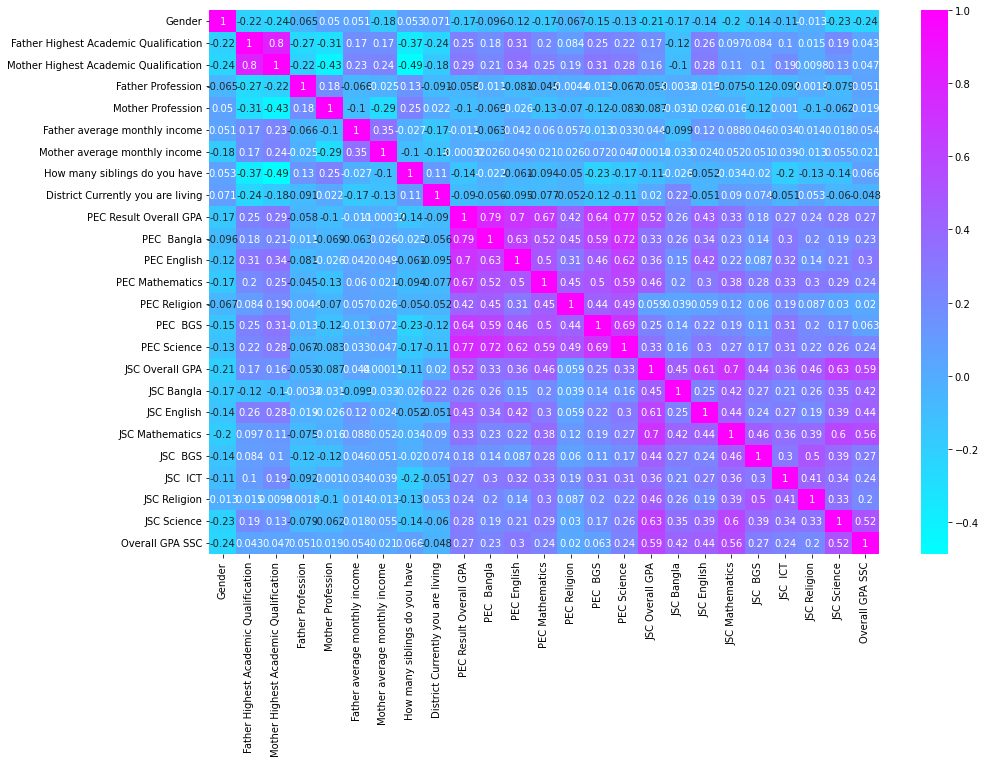

In [11]:
figure = plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.cool)

In [12]:
X = df.drop(columns=['Overall GPA SSC'],axis=1)
y = df['Overall GPA SSC']

from sklearn.feature_selection import f_regression

# inputs:
#    X: pandas.DataFrame, features
#    y: pandas.Series, target variable
#    K: number of features to select

# compute F-statistics and initialize correlation matrix
F = pd.Series(f_regression(X, y)[0], index = X.columns)
corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

In [13]:
# initialize list of selected features and list of excluded features
selected = []
not_selected = X.columns.to_list()
scores = []

K = 10
# repeat K times
for i in range(K):
  
    # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
    if i > 0:
        last_selected = selected[-1]
        corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)
        
    # compute FCQ score for all the (currently) excluded features (this is Formula 2)
    score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)
    
    # find best feature, add it to selected and remove it from not_selected
    if not i==0:
        scores.append(score)
    best = score.index[score.argmax()]
    selected.append(best)
    not_selected.remove(best)

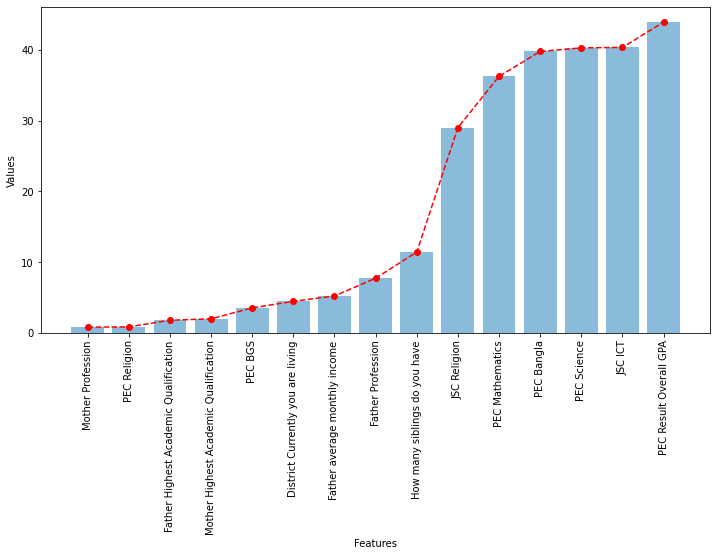

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

a = [
    ('Father Highest Academic Qualification', 1.775873),
    ('Mother Highest Academic Qualification', 1.975722),
    ('Father Profession', 7.716288),
    ('Mother Profession', 0.792006),
    ('Father average monthly income', 5.210022),
    ('How many siblings do you have', 11.409579),
    ('District Currently you are living', 4.444436),
    ('PEC Result Overall GPA', 43.905940),
    ('PEC Bangla', 39.763922),
    ('PEC Mathematics', 36.239709),
    ('PEC Religion', 0.841282),
    ('PEC BGS', 3.525324),
    ('PEC Science', 40.279683),
    ('JSC ICT', 40.336587),
    ('JSC Religion', 28.996675)
]

# Sort the data in ascending order
sorted_data = sorted(a, key=lambda x: x[1])

# Extract features and values
features = [entry[0] for entry in sorted_data]
values = [entry[1] for entry in sorted_data]

# Set the color palette to "blues_d"
sns.set_palette("Blues_d")

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(features, values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.plot(range(len(values)), values, 'r--', marker='o')  # Add lines connecting the bars
plt.show()

In [17]:
# X = df.drop(columns=['Overall GPA SSC'],axis=1)
# y = df['Overall GPA SSC']

# selected_features = mrmr_classif(X=X, y=y, K=10)
# X_mrmr = df[selected_features]
# X_mrmr = scale(X_mrmr)

X = df[selected]
y = df['Overall GPA SSC']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Metrics

In [19]:
l = []
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def metrics(model_name, y_pred_test_x):
    mean = mean_absolute_error(y_test, y_pred_test_x)
    rmse = mean_squared_error(y_test, y_pred_test_x, squared=False)
    r2 = r2_score(y_test, y_pred_test_x)
    explained_variance = explained_variance_score(y_test, y_pred_test_x, sample_weight=None, multioutput='uniform_average')
    max_error_ = max_error(y_test, y_pred_test_x)
    mean_poisson_deviance_ = mean_poisson_deviance(y_test, y_pred_test_x)
    mean_gamma_deviance_ = mean_gamma_deviance(y_test, y_pred_test_x)
    mean_absolute_percentage_error_ = mean_absolute_percentage_error(y_test, y_pred_test_x)
    d2_tweedie_score_ = d2_tweedie_score(y_test, y_pred_test_x)
    mape_ = mape(y_test, y_pred_test_x)
    
    print("Mean Absolute Error: ",mean )
    print("Mean Squared Error: ",rmse )
    print("R2 score: ",r2 )
    print("Explained Variance: ",explained_variance )
    print("max_error: ",max_error_ )
    print("neg_mean_poisson_deviance: ",mean_poisson_deviance_ )
    print("neg_mean_gamma_deviance: ",mean_gamma_deviance_ )
    print("neg_mean_absolute_percentage_error: ",mean_absolute_percentage_error_ )
    print("d2_tweedie_score: ",d2_tweedie_score_ )
    print("mape_: ", mape_)
    l.append([model_name, explained_variance, max_error_, mean, rmse, r2, mape_, mean_poisson_deviance_, mean_gamma_deviance_, mean_absolute_percentage_error_, d2_tweedie_score_])

In [26]:
from sklearn.inspection import permutation_importance

feature_names = ['Gender', 'F Edu', 'M Edu', 'F Prof', 'M Prof', 'F Avg Inc', 'M Avg Inc', 'Siblings', 'Distri','Pec Res Ov' ,'Pec Bangla','Pec English', 'Pec Math', 'Pec Reli', 'Pec BGS', 'Pec Sci', 'Jsc Res Ov','Jsc Bangla','Jsc english','Jsc Math','Jsc bgs','jsc ict','jsc reli', 'jsc sci']
features = np.array(feature_names)

def feature_importance(model):
    perm_importance = permutation_importance(model, X_test, y_test)
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
    plt.xlabel("Permutation Importance")

def predicted_plot(y_pred_test_x):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_pred_test_x, y_test, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()
    plt.show()

### SVR

Mean Absolute Error:  0.24180361335372344
Mean Squared Error:  0.3452370654616671
R2 score:  -0.2745989407869942
Explained Variance:  -0.07953648036512218
max_error:  1.0101542048995689
neg_mean_poisson_deviance:  0.02549252604536955
neg_mean_gamma_deviance:  0.005461814660769753
neg_mean_absolute_percentage_error:  0.05446949695821741
d2_tweedie_score:  -0.2745989407869942
mape_:  5.446949695821741


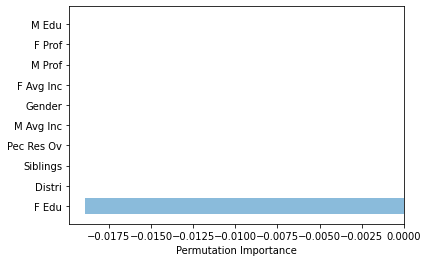

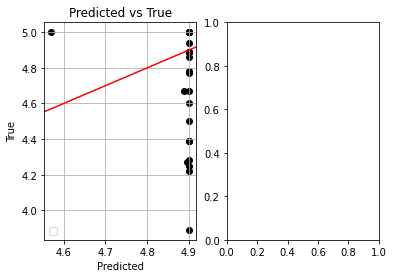

In [27]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train,y_train)

y_pred_test_x_svr = svr.predict(X_test)
metrics("SVR",y_pred_test_x_svr)
feature_importance(svr)
predicted_plot(y_pred_test_x_svr)

Mean Absolute Error:  0.1959359972190568
Mean Squared Error:  0.269412572355552
R2 score:  0.22379857176249185
Explained Variance:  0.23180355306075373
max_error:  0.606099999999997
neg_mean_poisson_deviance:  0.01595133561752863
neg_mean_gamma_deviance:  0.003512412525624699
neg_mean_absolute_percentage_error:  0.042376721466158895
d2_tweedie_score:  0.22379857176249185
mape_:  4.237672146615889


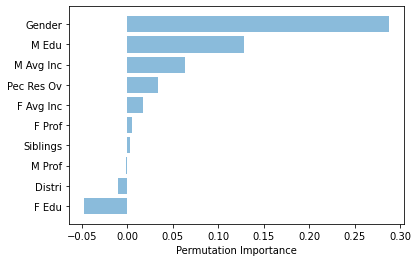

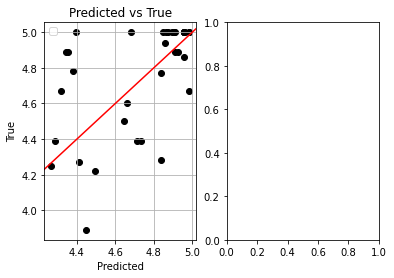

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train,y_train)

y_pred_test_x_rf = rf_regressor.predict(X_test)
metrics("Random Forest",y_pred_test_x_rf)
feature_importance(rf_regressor)
predicted_plot(y_pred_test_x_rf)

Mean Absolute Error:  0.19934058806864316
Mean Squared Error:  0.25697656718490186
R2 score:  0.293803164709595
Explained Variance:  0.36010731072483526
max_error:  0.7060165964594276
neg_mean_poisson_deviance:  0.014088394773236906
neg_mean_gamma_deviance:  0.0030124104334863233
neg_mean_absolute_percentage_error:  0.041874108058631405
d2_tweedie_score:  0.293803164709595
mape_:  4.1874108058631405


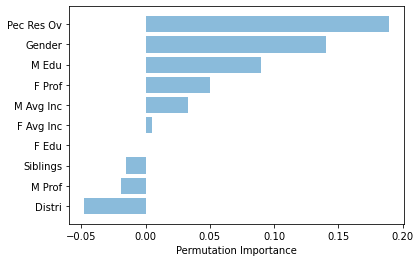

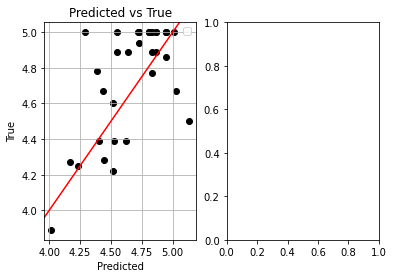

In [29]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_pred_test_x_lr = lr.predict(X_test)
metrics("Linear Regression",y_pred_test_x_lr)
feature_importance(lr)
predicted_plot(y_pred_test_x_lr)

Mean Absolute Error:  0.2222880839571318
Mean Squared Error:  0.2660932049710994
R2 score:  0.2428075250461842
Explained Variance:  0.27057646120406775
max_error:  0.6755555555555546
neg_mean_poisson_deviance:  0.015444246449181773
neg_mean_gamma_deviance:  0.003377286327888004
neg_mean_absolute_percentage_error:  0.04755157728371391
d2_tweedie_score:  0.2428075250461842
mape_:  4.755157728371391


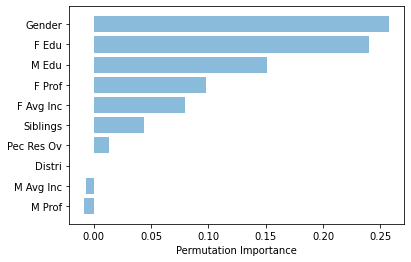

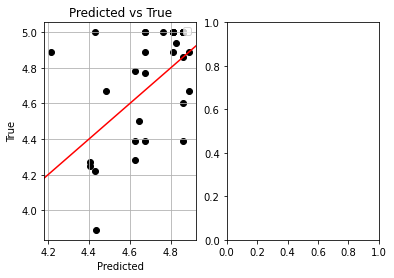

In [30]:
from sklearn.ensemble import AdaBoostRegressor
ADA = AdaBoostRegressor(n_estimators=5, random_state=42)
ADA.fit(X_train, y_train)

y_pred_test_x_ada = ADA.predict(X_test)
metrics("ADA Boost Regressor",y_pred_test_x_ada)
feature_importance(ADA)
predicted_plot(y_pred_test_x_ada)

Mean Absolute Error:  0.1867568544660296
Mean Squared Error:  0.2494001861691619
R2 score:  0.33483059228860046
Explained Variance:  0.337585806139448
max_error:  0.5768388366699218
neg_mean_poisson_deviance:  0.013614952571935797
neg_mean_gamma_deviance:  0.0029862411798551947
neg_mean_absolute_percentage_error:  0.040428948411430576
d2_tweedie_score:  0.33483059228860046
mape_:  4.042894841143058


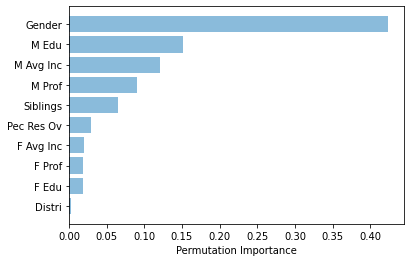

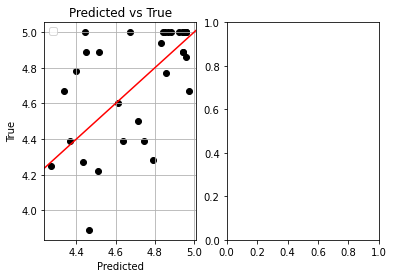

In [31]:
import xgboost
XG = xgboost.XGBRFRegressor()
XG.fit(X_train, y_train)

y_pred_test_x_XG = XG.predict(X_test)
metrics("XGBoost",y_pred_test_x_XG)
feature_importance(XG)
predicted_plot(y_pred_test_x_XG)

In [34]:
# from sklearn.neural_network import MLPRegressor
# MLP = MLPRegressor(random_state=42, max_iter=2000)
# MLP.fit(X_train, y_train)

# y_pred_test_x_MLP = MLP.predict(X_test)
# metrics("MLP",y_pred_test_x_MLP)
# feature_importance(MLP)
# predicted_plot(y_pred_test_x_MLP)

Mean Absolute Error:  0.23140004469085979
Mean Squared Error:  0.26600974739712835
R2 score:  0.24328242283237334
Explained Variance:  0.25231738481878674
max_error:  0.7255115179480147
neg_mean_poisson_deviance:  0.01533540919777252
neg_mean_gamma_deviance:  0.003330725620450663
neg_mean_absolute_percentage_error:  0.050092923478732114
d2_tweedie_score:  0.24328242283237334
mape_:  5.009292347873211


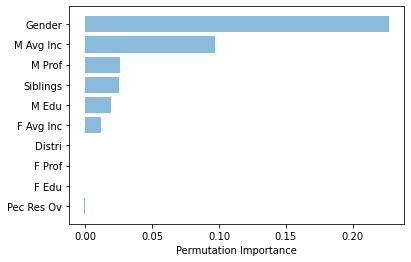

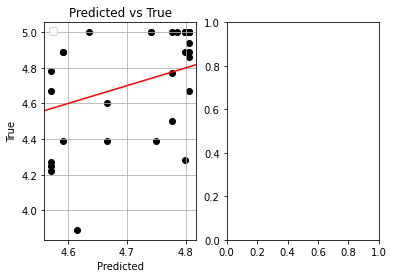

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
GRADIENT = GradientBoostingRegressor(n_estimators=5, random_state=42)
GRADIENT.fit(X_train, y_train)

y_pred_test_x_GRADIENT = GRADIENT.predict(X_test)
metrics("GRADIENT",y_pred_test_x_GRADIENT)
feature_importance(GRADIENT)
predicted_plot(y_pred_test_x_GRADIENT)

In [36]:
estimator=[]
for i in range(1, 30):
    model = GradientBoostingRegressor(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test) 
    estimator.append(score)
    
(estimator.index(max(estimator)))+1

13

Mean Absolute Error:  0.19822901190423078
Mean Squared Error:  0.25202514280233107
R2 score:  0.32075498565214133
Explained Variance:  0.32859655902113183
max_error:  0.5923719518903492
neg_mean_poisson_deviance:  0.013860535797149253
neg_mean_gamma_deviance:  0.003030933147277867
neg_mean_absolute_percentage_error:  0.0428123880895069
d2_tweedie_score:  0.32075498565214133
mape_:  4.2812388089506905


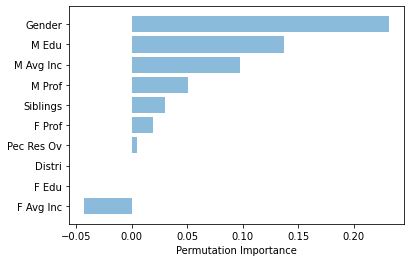

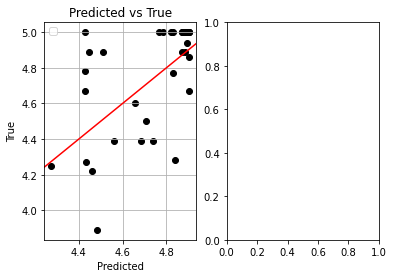

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
GRADIENT = GradientBoostingRegressor(n_estimators= 17, random_state=42)
GRADIENT.fit(X_train, y_train)

y_pred_test_x_GRADIENT = GRADIENT.predict(X_test)
metrics("Optimized GRADIENT",y_pred_test_x_GRADIENT)
feature_importance(GRADIENT)
predicted_plot(y_pred_test_x_GRADIENT)

Mean Absolute Error:  0.19897142857142863
Mean Squared Error:  0.2506355350475495
R2 score:  0.3282247321271129
Explained Variance:  0.33468126749227034
max_error:  0.5329999999999999
neg_mean_poisson_deviance:  0.01360661169258829
neg_mean_gamma_deviance:  0.0029538489242380323
neg_mean_absolute_percentage_error:  0.04356587733261367
d2_tweedie_score:  0.3282247321271129
mape_:  4.3565877332613665


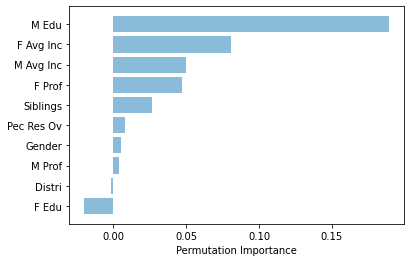

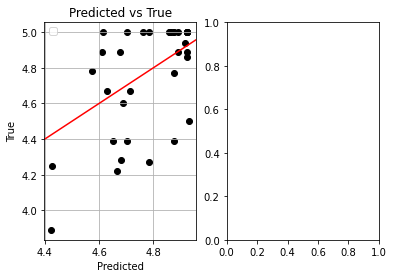

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_test_x_knn = knn.predict(X_test)
metrics("KNN",y_pred_test_x_knn)
feature_importance(knn)
predicted_plot(y_pred_test_x_knn)

In [39]:
df = pd.DataFrame(l, columns=["model_name", "explained_variance", "max_error", "mean", "rmse", "r2","mape", "mean_poisson_deviance", "mean_gamma_deviance", "mean_absolute_percentage_error", "d2_tweedie_score"])
df

,model_name,explained_variance,max_error,mean,rmse,r2,mape,mean_poisson_deviance,mean_gamma_deviance,mean_absolute_percentage_error,d2_tweedie_score
0,Linear Regression,0.360107,0.706017,0.199341,0.256977,0.293803,4.187411,0.014088,0.003012,0.041874,0.293803
1,ADA Boost Regressor,0.270576,0.675556,0.222288,0.266093,0.242808,4.755158,0.015444,0.003377,0.047552,0.242808
2,XGBoost,0.337586,0.576839,0.186757,0.249400,0.334831,4.042895,0.013615,0.002986,0.040429,0.334831
3,SVR,-0.079536,1.010154,0.241804,0.345237,-0.274599,5.446950,0.025493,0.005462,0.054469,-0.274599
4,Random Forest,0.231804,0.606100,0.195936,0.269413,0.223799,4.237672,0.015951,0.003512,0.042377,0.223799
5,Linear Regression,0.360107,0.706017,0.199341,0.256977,0.293803,4.187411,0.014088,0.003012,0.041874,0.293803
6,ADA Boost Regressor,0.270576,0.675556,0.222288,0.266093,0.242808,4.755158,0.015444,0.003377,0.047552,0.242808
7,XGBoost,0.337586,0.576839,0.186757,0.249400,0.334831,4.042895,0.013615,0.002986,0.040429,0.334831
8,GRADIENT,0.252317,0.725512,0.231400,0.266010,0.243282,5.009292,0.015335,0.003331,0.050093,0.243282
9,Optimized GRADIENT,0.328597,0.592372,0.198229,0.252025,0.320755,4.281239,0.013861,0.003031,0.042812,0.320755


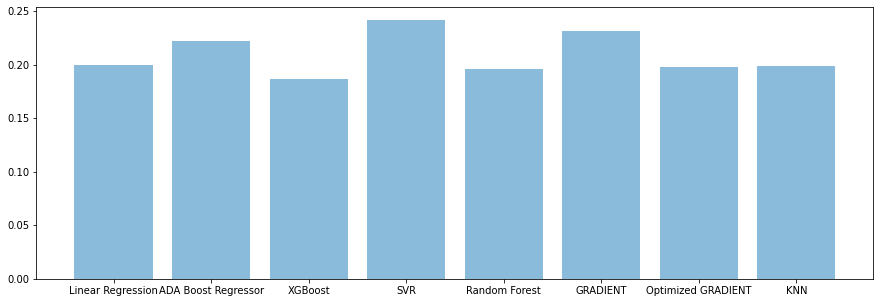

In [40]:
model_names = df['model_name']
means = df['mean']
plt.rcParams["figure.figsize"] = (15,5)
plt.bar(model_names, means)
plt.show()

In [42]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train[0])

In [ ]:
import lime
import lime.lime_tabular
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names= feature_names,
                                                  class_names=['MEDV'], verbose=True, mode='regression')

In [ ]:
j = 5
exp = explainer.explain_instance(X_test[j], rf_regressor.predict, num_features=6)

# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
j = 7
exp = explainer.explain_instance(X_test[j], rf_regressor.predict, num_features=6)

# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
j = 16
exp = explainer.explain_instance(X_test[j], rf_regressor.predict, num_features=6)

# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
test = y_test
test = test.to_numpy()

In [ ]:
for i in range(10,15):
    exp = explainer.explain_instance(X_test[i], rf_regressor.predict, num_features=6)
    # Show the predictions
    print("Y True: ", test[i])
    exp.show_in_notebook(show_table=True)

In [ ]:
y_test

In [ ]:
df = pd.read_csv('/kaggle/input/secondary-school-result/Science.csv') 
y = df['Overall GPA SSC']
X = df.drop(columns=['Overall GPA SSC'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Import the SMOTE-NC
from imblearn.over_sampling import SMOTENC
#Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are. In this case, 'IsActiveMember' is positioned in the second column we input [1] as the parameter. If you have more than one categorical columns, just input all the columns position
smotenc = SMOTENC([1],random_state = 101)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)